In [2]:
"""
Script for reading in WRF met_em files and editing SST
"""
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
file_paths = glob.glob("/gpfs_common/mea716_share/legetker/derecho_project/WRF-master/test/em_real/wrfinput*") #get all of the met_em files needed
new_file_path = "/scratch/legetker/metem_2deg/" #Output directory

In [1]:
for i in range(len(file_paths)):
    with xr.open_dataset(file_paths[i]) as ds:
        file_name = file_paths[i][25:] #You'll have to edit this: getting just the filename, cutting off the rest of the path
        ssts = ds['SST'].values
        
        #Go through every grid point in the file
        for i in range(ssts.shape[1]):
            for j in range(ssts.shape[2]):
                if ssts[0, i,j] != 0:
                    ssts[0, i,j] += 2 #Add temperature delta
        ds['SST'].values = ssts #Overwrite existing data
    ds.to_netcdf(path = new_file_path + file_name, mode = 'w',format = "NETCDF4")

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


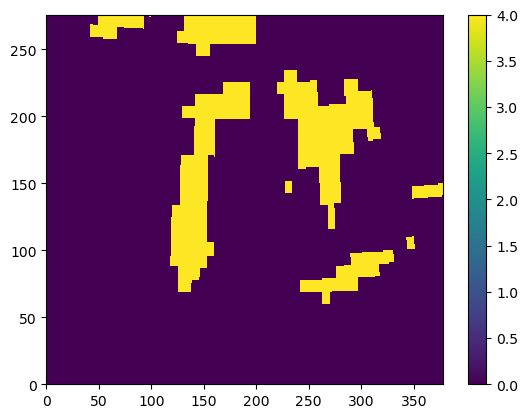

In [3]:
"""
Test case: how does the difference field look?
"""
new_file = "/scratch/legetker/metem_2deg/met_em.d02.1998-05-30_18:00:00.nc"
with xr.open_dataset(new_file) as ds:
    sst_new = ds['SST'].values
    
old_file = "/scratch/legetker/met_em/met_em.d02.1998-05-30_18:00:00.nc"
with xr.open_dataset(old_file) as ds:
    sst_old = ds['SST'].values
    
sst_diff = sst_new - sst_old
c = plt.pcolormesh(sst_diff[0,:,:])
plt.colorbar(c)
print(sst_new - sst_old)